In [1]:
### IMPORT ESSENTIAL LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 16, 10
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


import os
from IPython.display import HTML

Importing plotly failed. Interactive plots will not work.


In [166]:
#Charge .csv 
#pd.set_option('display.float_format', '{:.2f}'.format)
df_ARB = pd.read_csv('df_country/ARB.csv')
#df_ARB = df_ARB.append({'Year' : 2011}, ignore_index=True)
df_ARB.head()

,Year,NY.GDP.MKTP.KD.ZG_val,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
0,1960,nan,159.95,354000000.00,53.29,50000.00
1,1961,nan,155.31,463500000.00,52.89,80000.00
2,1962,nan,152.23,403000000.00,52.55,90000.00
3,1963,nan,156.52,311100000.00,52.27,180000.00
4,1964,nan,152.17,271400000.00,52.07,190000.00


In [167]:
#to clean to the year_x_na GDP value 
df_ARB = df_ARB.iloc[range(16,52),:]
df_ARB.tail()

,Year,NY.GDP.MKTP.KD.ZG_val,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
47,2007,5.74,35.72,1702360000.00,61.38,854450000.00
48,2008,6.34,34.53,1466250000.00,61.79,2031880000.00
49,2009,1.49,33.35,1029510000.00,62.14,307250000.00
50,2010,4.70,32.28,883410000.00,62.41,505090000.00
51,2011,nan,nan,nan,nan,nan


In [168]:
#Input the missing data
df_ARB = df_ARB.fillna(method='bfill') #I think that we can find a better way to input data sure
df_ARB.head()

,Year,NY.GDP.MKTP.KD.ZG_val,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
16,1976,12.60,107.69,277440000.00,51.98,44100000.00
17,1977,8.30,103.47,247800000.00,52.05,176660000.00
18,1978,1.67,99.18,296610000.00,52.13,242390000.00
19,1979,10.28,94.94,331270000.00,52.22,187830000.00
20,1980,9.59,90.72,432870000.00,52.35,174810000.00


In [169]:
## we rename date as 'ds' and Net Sales as 'y'
## Prophet makes it compulsory to rename these columns as such
df_ARB = df_ARB.rename(columns={'Year':'ds',
                     'NY.GDP.MKTP.KD.ZG_val':'y'
                     })
df_ARB.head()

,ds,y,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
16,1976,12.60,107.69,277440000.00,51.98,44100000.00
17,1977,8.30,103.47,247800000.00,52.05,176660000.00
18,1978,1.67,99.18,296610000.00,52.13,242390000.00
19,1979,10.28,94.94,331270000.00,52.22,187830000.00
20,1980,9.59,90.72,432870000.00,52.35,174810000.00


In [170]:
df_ARB.set_index('ds', inplace=True)
df_ARB.tail()

,y,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
ds,,,,,
2007,5.74,35.72,1702360000.00,61.38,854450000.00
2008,6.34,34.53,1466250000.00,61.79,2031880000.00
2009,1.49,33.35,1029510000.00,62.14,307250000.00
2010,4.70,32.28,883410000.00,62.41,505090000.00
2011,nan,nan,nan,nan,nan


In [171]:
df2_ARB = df_ARB.copy() 
df2_ARB.drop(df2_ARB.tail(1).index,inplace=True)
df2_ARB.tail()

,y,SP.DYN.IMRT.IN_val,DC.DAC.FRAL.CD_val,SP.POP.1564.TO.ZS_val,DC.DAC.JPNL.CD_val
ds,,,,,
2006,7.23,36.91,1795520000.00,60.91,941440000.00
2007,5.74,35.72,1702360000.00,61.38,854450000.00
2008,6.34,34.53,1466250000.00,61.79,2031880000.00
2009,1.49,33.35,1029510000.00,62.14,307250000.00
2010,4.70,32.28,883410000.00,62.41,505090000.00


## VAR MODEL  

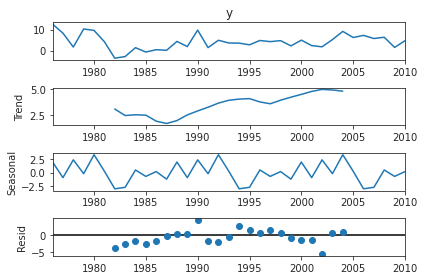

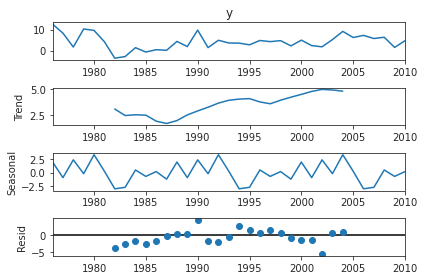

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2_ARB['y'], model='additive', period=12)
result.plot()

In [202]:
## Split the data into training and testing
df = df_ARB.copy() 
#df2 = df2_ARB.copy()
#nobs = 1 
nobs= 7 ## we use the values on the last 10 months as the test set
#df2_train, df2_test = df2[0:-nobs2], df2[-nobs2:]
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(29, 5)
(7, 5)


In [203]:
# 1st order differencing
df_differenced = df_train.diff().dropna()
#df2_differenced = df2_train.diff().dropna()

# 2nd order differencing
df_differenced = df_differenced.diff().dropna()
#df2_differenced = df2_differenced.diff().dropna()

Text(0.5, 1.0, 'GDP - 2nd order differenced')

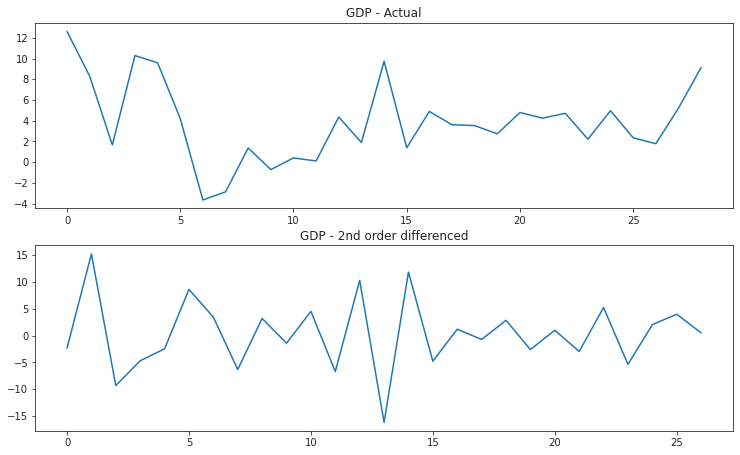

In [204]:
fig, ax = plt.subplots(2,1, figsize=(12.5,7.5))

df_train.reset_index()['y'].plot(ax=ax[0])
df_differenced.reset_index()['y'].plot(ax=ax[1])
ax[0].set_title('GDP - Actual')
ax[1].set_title('GDP - 2nd order differenced')

In [209]:
#fig, ax = plt.subplots(2,1, figsize=(12.5,7.5))

#df2_train.reset_index()['y'].plot(ax=ax[0])
#df2_differenced.reset_index()['y'].plot(ax=ax[1])
#ax[0].set_title('GDP - Actual')
#ax[1].set_title('GDP - 2nd order differenced')

In [207]:
model = VAR(df_differenced)
x = model.select_order(maxlags=3)
x.summary()

/home/adria/Desktop/RI/gdp_growth_forecast/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


,AIC,BIC,FPE,HQIC
0,73.36,73.60*,7.233e+31,73.42
1,73.52,74.99,8.941e+31,73.91
2,72.98,75.68,7.194e+31,73.70
3,71.68*,75.61,5.358e+31*,72.72*


In [208]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Nov, 2020
Time:                     12:19:47
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -5.98325
Nobs:                     23.0000    HQIC:                  -9.86333
Log likelihood:           70.2429    FPE:                 0.00788925
AIC:                     -11.1670    Det(Omega_mle):     0.000307983
--------------------------------------------------------------------
Results for equation y
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.983972         1.364038            0.721           0.471
L1.y                            -1.261976         0.381889           -3.305           0.001
L1.SP.DYN.IMRT.IN_va

In [210]:
#model2_fitted = model2.fit(4)
#model_fitted.summary()

In [211]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order) 

# Separate input data for forecasting
# the goal is to forecast based on the last 4 inputs (since the lag is 4)
forecast_input = df_differenced.values[-lag_order:]

4


In [212]:
# Get the lag order
#lag_order = model2_fitted.k_ar
#print(lag_order) 

# Separate input data for forecasting
# the goal is to forecast based on the last 4 inputs (since the lag is 4)
#forecast_input = df2_differenced.values[-lag_order:]

In [213]:
# Forecast
## we insert the last four values and inform the model to predict the next 10 values

fc = model_fitted.forecast(y=forecast_input, steps=nobs)

## organize the output into a clear DataFrame layout, add '_f' suffix at each column indicating they are the forecasted values
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_f')
df_forecast

,y_f,SP.DYN.IMRT.IN_val_f,DC.DAC.FRAL.CD_val_f,SP.POP.1564.TO.ZS_val_f,DC.DAC.JPNL.CD_val_f
ds,,,,,
2005,-15.05,0.08,-219699283.38,-0.03,-1278807593.40
2006,24.36,0.31,112140083.81,0.01,-364336994.00
2007,-15.28,0.57,32705199.83,0.17,2946791919.61
2008,2.58,-0.22,125574422.41,-0.10,-2561875644.46
2009,-0.08,0.29,-323276178.02,0.04,-260648111.31
2010,6.11,0.54,83741456.73,-0.05,1459651570.14
2011,-9.11,0.04,224931797.53,0.17,141357353.11


In [214]:
# Forecast
## we insert the last four values and inform the model to predict the next 10 values

fc2 = model2_fitted.forecast(y=forecast_input, steps=nobs)

## organize the output into a clear DataFrame layout, add '_f' suffix at each column indicating they are the forecasted values
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_f')
df_forecast

,y_f,SP.DYN.IMRT.IN_val_f,DC.DAC.FRAL.CD_val_f,SP.POP.1564.TO.ZS_val_f,DC.DAC.JPNL.CD_val_f
ds,,,,,
2005,-15.05,0.08,-219699283.38,-0.03,-1278807593.40
2006,24.36,0.31,112140083.81,0.01,-364336994.00
2007,-15.28,0.57,32705199.83,0.17,2946791919.61
2008,2.58,-0.22,125574422.41,-0.10,-2561875644.46
2009,-0.08,0.29,-323276178.02,0.04,-260648111.31
2010,6.11,0.54,83741456.73,-0.05,1459651570.14
2011,-9.11,0.04,224931797.53,0.17,141357353.11


In [215]:
# get a copy of the forecast
df_fc = df_forecast.copy()

# get column name from the original dataframe
columns = df_train.columns

# Roll back from the 1st order differencing
# we take the cumulative sum (from the top row to the bottom) for each of the forecasting data, 
## and the add to the previous step's original value (since we deduct each row from the previous one)
## we rename the new forecasted column with the prefix 'forecast'

# for col in columns: 
#     df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_f'].cumsum()

## if you perform second order diff, make sure to get the difference from the last row and second last row of df_train
for col in columns:
    df_fc[str(col)+'_first_differenced'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_f'].cumsum()
    df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_first_differenced'].cumsum()
df_results = df_fc

In [216]:
df_results

,y_f,SP.DYN.IMRT.IN_val_f,DC.DAC.FRAL.CD_val_f,SP.POP.1564.TO.ZS_val_f,DC.DAC.JPNL.CD_val_f,y_first_differenced,y_forecast,SP.DYN.IMRT.IN_val_first_differenced,SP.DYN.IMRT.IN_val_forecast,DC.DAC.FRAL.CD_val_first_differenced,DC.DAC.FRAL.CD_val_forecast,SP.POP.1564.TO.ZS_val_first_differenced,SP.POP.1564.TO.ZS_val_forecast,DC.DAC.JPNL.CD_val_first_differenced,DC.DAC.JPNL.CD_val_forecast
ds,,,,,,,,,,,,,,,
2005,-15.05,0.08,-219699283.38,-0.03,-1278807593.40,-11.13,-1.99,-1.13,38.12,-101009283.38,760570716.62,0.50,60.41,-698297593.40,183072406.60
2006,24.36,0.31,112140083.81,0.01,-364336994.00,13.24,11.25,-0.81,37.31,11130800.44,771701517.06,0.52,60.93,-1062634587.40,-879562180.79
2007,-15.28,0.57,32705199.83,0.17,2946791919.61,-2.04,9.21,-0.24,37.07,43836000.27,815537517.33,0.69,61.61,1884157332.22,1004595151.42
2008,2.58,-0.22,125574422.41,-0.10,-2561875644.46,0.54,9.75,-0.47,36.60,169410422.68,984947940.00,0.58,62.20,-677718312.25,326876839.17
2009,-0.08,0.29,-323276178.02,0.04,-260648111.31,0.46,10.21,-0.18,36.43,-153865755.35,831082184.66,0.62,62.82,-938366423.56,-611489584.38
2010,6.11,0.54,83741456.73,-0.05,1459651570.14,6.57,16.78,0.36,36.79,-70124298.62,760957886.04,0.57,63.39,521285146.58,-90204437.80
2011,-9.11,0.04,224931797.53,0.17,141357353.11,-2.54,14.24,0.40,37.19,154807498.91,915765384.95,0.74,64.12,662642499.70,572438061.90


In [17]:
df_results.loc[:, [ 'y_forecast', 
                    'DC.DAC.FRAL.CD_val_forecast',     
                    'SP.POP.1564.TO.ZS_val_forecast', 
                    'DC.DAC.JPNL.CD_val_forecast']]

,y_forecast,DC.DAC.FRAL.CD_val_forecast,SP.POP.1564.TO.ZS_val_forecast,DC.DAC.JPNL.CD_val_forecast
ds,,,,
2004,8.14,887450973.82,60.01,-293101835.46
2005,12.18,887913363.33,60.74,-743150736.03
2006,10.94,920722908.94,61.56,-1307137682.41
2007,14.38,964638500.29,62.56,-1670953847.60
2008,12.18,871935596.10,63.61,-1851460268.27
2009,17.59,675268629.09,64.68,-3078061279.65
2010,19.02,486462120.52,65.80,-3222687661.39


In [220]:
forecast = df_results['y_forecast'].values
actual = df_test['y']

mae = np.mean(np.abs(forecast - actual))    # MAE
rmse = np.mean((forecast - actual)**2)**.5  # RMSE
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
print('Mean Absolute Error           : ', mae) 
print('Root Mean Squared Error       : ',rmse)
print('Mean Absolute Percentage Error: ',mape)

Mean Absolute Error           :  6.653273994661032
Root Mean Squared Error       :  7.4100721244064855
Mean Absolute Percentage Error:  1.9106974912327022


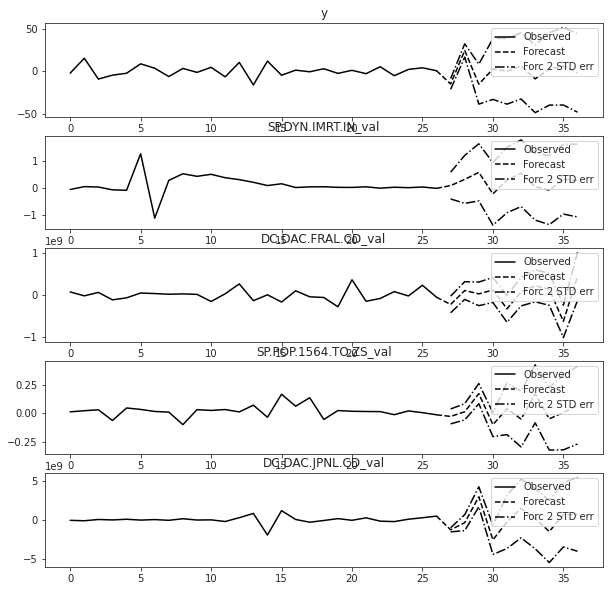

In [221]:
## you can use the statsmodels plot_forecast method but the output is not clean
fig = model_fitted.plot_forecast(10)

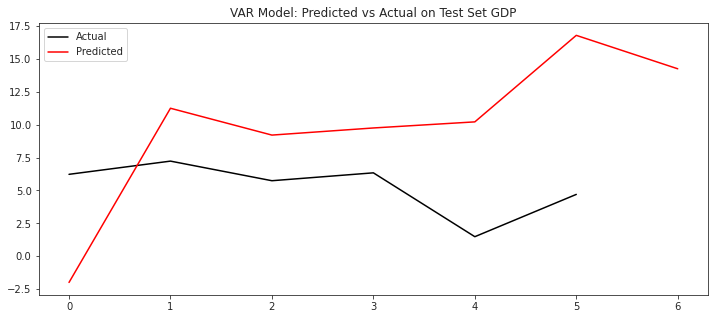

In [228]:
fig, ax = plt.subplots(figsize=(12, 5))

df_test.reset_index()['y'].plot(color='k', label='Actual')
df_results.reset_index()['y_forecast'].plot(color='r', label='Predicted')

plt.title('VAR Model: Predicted vs Actual on Test Set GDP')
ax.legend()

In [233]:
2df_results.reset_index()['y_forecast'].tail(1).tolist() 

[14.243907334754937]